 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [708]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [ ]:
# Reading whale returns

In [192]:
csvpath = Path('whale_returns.csv')

In [193]:
whale_dataframe = pd.read_csv((csvpath), infer_datetime_format=True)
whale_dataframe = whale_dataframe.set_index(pd.to_datetime(whale_dataframe["Date"], infer_datetime_format=True))
whale_dataframe = whale_dataframe.drop(columns=["Date"])

In [194]:
whale_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [46]:
whale_dataframe.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [15]:
whale_dataframe.describe().round(4)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.0000,1059.0000,1059.0000,1059.0000
mean,0.0002,-0.0002,-0.0001,0.0005
std,0.0078,0.0070,0.0108,0.0128
min,-0.0327,-0.0321,-0.1398,-0.0665
25%,-0.0036,-0.0040,-0.0047,-0.0055
50%,0.0005,0.0000,0.0002,0.0006
75%,0.0043,0.0036,0.0052,0.0075
max,0.0430,0.0293,0.0807,0.0613


In [53]:
# Count nulls
whale_dataframe.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [59]:
whale_dataframe.isnull().sum() 

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [201]:
# Drop nulls
whale_dataframe = whale_dataframe.dropna().copy()
whale_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [63]:
whale_dataframe.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [195]:
# Reading algorithmic returns
csvpath = Path('algo_returns.csv')
algo_dataframe = pd.read_csv((csvpath), infer_datetime_format=True)
algo_dataframe = algo_dataframe.set_index(pd.to_datetime(algo_dataframe["Date"], infer_datetime_format=True))
algo_dataframe = algo_dataframe.drop(columns=["Date"])


In [196]:
algo_dataframe.describe().round(4)

,Algo 1,Algo 2
count,1241.0000,1235.0000
mean,0.0007,0.0003
std,0.0080,0.0085
min,-0.0310,-0.0369
25%,-0.0032,-0.0037
50%,0.0001,0.0006
75%,0.0040,0.0052
max,0.0982,0.0837


In [47]:
algo_dataframe.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [247]:
# Count nulls
algo_dataframe.count()

Algo 1    1235
Algo 2    1235
dtype: int64

In [248]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna().copy()
algo_dataframe.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [249]:
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [657]:
# Reading S&P 500 Closing Prices

csvpath = Path('sp500_history.csv')
SP500_dataframe = pd.read_csv(csvpath)

SP500_dataframe.index = pd.to_datetime(SP500_dataframe['Date'], infer_datetime_format=True)
SP500_dataframe = SP500_dataframe.drop(columns=['Date'])
SP500_dataframe = SP500_dataframe.sort_index() 
SP500_dataframe = SP500_dataframe.rename(columns = {'Close':'Price'})
SP500_dataframe


,Price
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [658]:
# Check Data Types
SP500_dataframe.describe().round(4)

,Price
count,1649
unique,1639
top,$2268.90
freq,2


In [659]:
SP500_dataframe.dtypes

Price    object
dtype: object

In [660]:
SP500_dataframe.count()

Price    1649
dtype: int64

In [662]:
# Fix Data Types
SP500_dataframe["Price"] = SP500_dataframe["Price"].str.replace("$","")

In [663]:
SP500_dataframe.head()

,Price
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [664]:
SP500_dataframe.dtypes

Price    object
dtype: object

In [667]:
SP500_dataframe["Price"] = SP500_dataframe["Price"].astype("float")

In [668]:
SP500_dataframe.dtypes

Price    float64
dtype: object

In [669]:
# Drop nulls
SP500_dataframe = SP500_dataframe.dropna().copy()

In [671]:
SP500_dataframe.isnull().sum()

Price    0
dtype: int64

In [672]:
SP500_dataframe

,Price
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [674]:
# Calculate Daily Returns

daily_returns_SP500 = SP500_dataframe.pct_change()

daily_returns_SP500

,Price
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [675]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

ombined_dataframe = pd.concat([whale_dataframe,algo_dataframe,daily_returns_SP500], axis = 'columns', join='inner')
combined_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily return500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

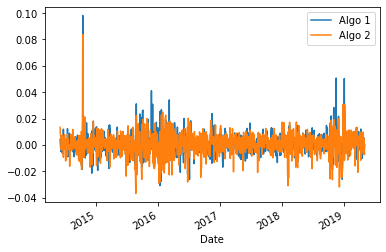

In [676]:
# Plot daily returns of all portfolios

algo_dataframe.plot()

<AxesSubplot:xlabel='Date'>

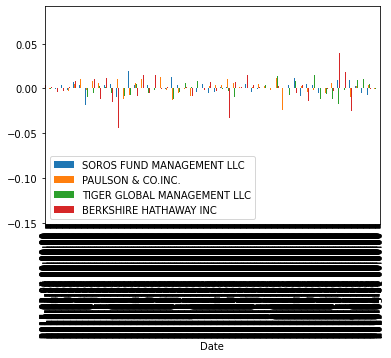

In [289]:
whale_dataframe.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

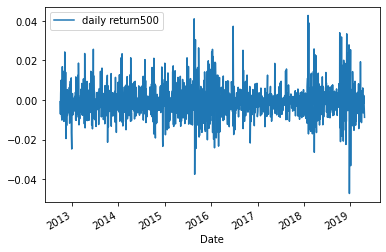

In [290]:
daily_returns_SP500.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

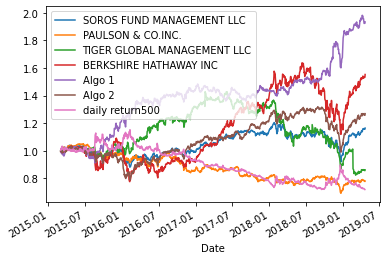

In [295]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_dataframe).cumprod()
cumulative_returns.head()

# Plot cumulative returns

cumulative_returns.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

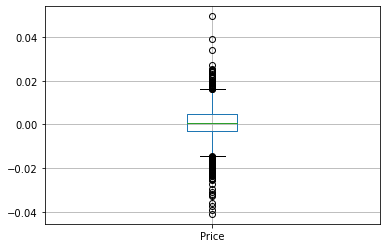

In [677]:
# Box plot to visually show risk
daily_returns_SP500.boxplot() 


<AxesSubplot:>

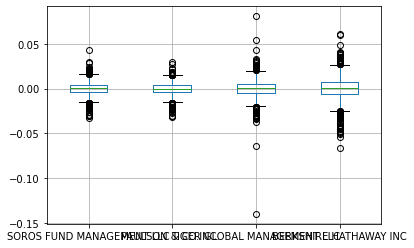

In [678]:
whale_dataframe.boxplot() 

<AxesSubplot:>

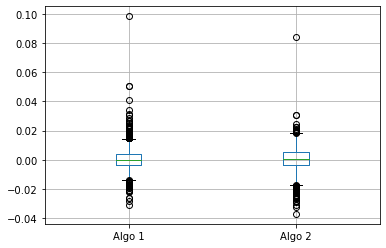

In [679]:
algo_dataframe.boxplot() 

### Calculate Standard Deviations

In [680]:
# Calculate the daily standard deviations of all portfolios

combined_dataframe_std = combined_dataframe.std()
combined_dataframe_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
daily return500                0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [681]:
# Calculate  the daily standard deviation of S&P 500

daily_returns_SP500_std = daily_returns_SP500.std()
daily_returns_SP500_std

# Determine which portfolios are riskier than the S&P 500

##Tiger Glocal Management LLC and Berkshire Hathaway INC have the highest standard deviation compared to other funds which tells us that they have a higher spread of returns and hence are more volatile.


Price    0.008111
dtype: float64

### Calculate the Annualized Standard Deviation

In [682]:
# Calculate the annualized standard deviation (252 trading days)

combined_dataframe_std_annualized = combined_dataframe_std * np.sqrt(252)
combined_dataframe_std_annualized.head(7)
combined_dataframe_std_annualized.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
daily return500                0.136313
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [683]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_dataframe_rollingstd = (combined_dataframe.rolling(window=21).std() * np.sqrt(252))

combined_dataframe_rollingstd




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily return500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.106529,0.098805,0.119569,0.154471,0.091430,0.111960,0.104313
2019-04-17,0.107516,0.101126,0.120237,0.150577,0.098878,0.113736,0.103266
2019-04-18,0.105289,0.100050,0.116332,0.150406,0.092604,0.113847,0.097426


<AxesSubplot:xlabel='Date'>

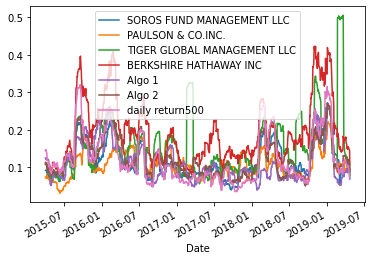

In [684]:
# Plot the rolling standard deviation

(combined_dataframe.rolling(window=21).std() * np.sqrt(252)).plot()

### Calculate and plot the correlation

In [685]:
# Calculate the correlation

combined_correlation = combined_dataframe.corr().round(2)
combined_correlation
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily return500
SOROS FUND MANAGEMENT LLC,1.00,0.70,0.56,0.75,0.32,0.83,0.00
PAULSON & CO.INC.,0.70,1.00,0.43,0.55,0.27,0.68,0.01
TIGER GLOBAL MANAGEMENT LLC,0.56,0.43,1.00,0.42,0.16,0.51,-0.00
BERKSHIRE HATHAWAY INC,0.75,0.55,0.42,1.00,0.29,0.69,-0.01
Algo 1,0.32,0.27,0.16,0.29,1.00,0.29,-0.03
Algo 2,0.83,0.68,0.51,0.69,0.29,1.00,-0.00
daily return500,0.00,0.01,-0.00,-0.01,-0.03,-0.00,1.00


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [686]:
# Calculate covariance of a single portfolio

##Covariance between Algo_1 and S&P500

covariance = combined_dataframe['Algo 1'].cov(combined_dataframe['daily return500'])
covariance




-2.2230425517155273e-06

In [696]:

# Calculate variance of S&P 500

daily_returns_SP500

variance = combined_dataframe['daily return500'].var()
variance

7.373467552840441e-05

In [697]:
# Computing beta

algo1_beta = covariance/variance

algo1_beta

print(f'algo1: {algo1_beta}')

algo1: -0.030149214542337772


In [710]:
# Plot beta trend


ax = algo1_beta.plot(figsize=(20,10), title = "Beta of Algo1")

ax.legend(["algo1_beta"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [321]:
# Annualized Sharpe Ratios

rf_rate = 0
combined_dataframe.mean()


SOROS FUND MANAGEMENT LLC      0.000177
PAULSON & CO.INC.             -0.000214
TIGER GLOBAL MANAGEMENT LLC   -0.000083
BERKSHIRE HATHAWAY INC         0.000506
Algo 1                         0.000662
Algo 2                         0.000263
daily return500               -0.000281
dtype: float64

In [311]:
combined_dataframe_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
daily return500                0.008587
dtype: float64

In [322]:
daily_sharpes = ((combined_dataframe.mean()-rf_rate))/combined_dataframe_std

In [323]:
daily_sharpes

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.086847
Algo 2                         0.031583
daily return500               -0.032668
dtype: float64

In [324]:
sharpe_ratios = daily_sharpes * np.sqrt(252)
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
daily return500               -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

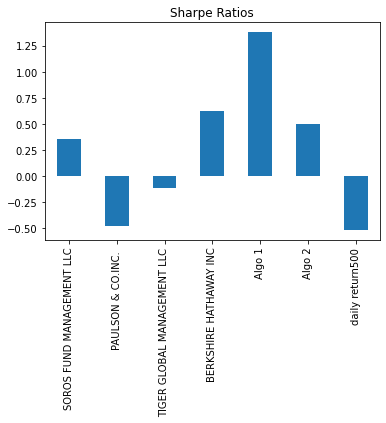

In [707]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
#Looking at the Sharpe Ratios, algorithm strategies outperformed the market and with exception of Berkshire Hathaway, other funds as well.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [408]:
# Reading data from 1st stock

csvpath = Path('aapl_historical.csv')
Apple_dataframe = pd.read_csv(csvpath)
Apple_dataframe.index = pd.to_datetime(Apple_dataframe['Trade DATE'], infer_datetime_format=True)
Apple_dataframe = Apple_dataframe.drop(columns=['Trade DATE','Symbol'])
Apple_dataframe = Apple_dataframe.sort_index() 
Apple_dataframe = Apple_dataframe.rename(columns = {'NOCP':'Apple'})
Apple_dataframe

,Apple
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [409]:
# Reading data from 2nd stock

csvpath = Path('cost_historical.csv')
Costco_dataframe = pd.read_csv(csvpath)
Costco_dataframe.index = pd.to_datetime(Costco_dataframe['Trade DATE'])
Costco_dataframe = Costco_dataframe.drop(columns=['Trade DATE','Symbol'])
Costco_dataframe = Costco_dataframe.sort_index() 
Costco_dataframe = Costco_dataframe.rename(columns = {'NOCP':'Costco'})
Costco_dataframe

,Costco
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [410]:
# Reading data from 3rd stock

csvpath = Path('goog_historical.csv')
Google_dataframe = pd.read_csv(csvpath)
Google_dataframe.index = pd.to_datetime(Google_dataframe['Trade DATE'])
Google_dataframe = Google_dataframe.drop(columns=['Trade DATE','Symbol'])
Google_dataframe = Google_dataframe.sort_index() 
Google_dataframe = Google_dataframe.rename(columns = {'NOCP':'Google'})
Google_dataframe

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
...,...
2019-05-03,1185.40
2019-05-06,1189.39
2019-05-07,1174.10


In [458]:
# Combine all stocks in a single DataFrame

myportfolio_dataframe = pd.concat([Apple_dataframe,Google_dataframe,Costco_dataframe], axis = 'columns', join='inner')
myportfolio_dataframe = myportfolio_dataframe.rename(columns = {'Trade DATE':'Date'})
myportfolio_dataframe

,Apple,Google,Costco
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [459]:
# Calculate daily returns

myportfolio_dataframe = myportfolio_dataframe.pct_change()
myportfolio_dataframe


,Apple,Google,Costco
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
...,...,...,...
2019-05-03,0.012431,0.019602,0.007953
2019-05-06,-0.015443,0.003366,-0.001594
2019-05-07,-0.026957,-0.012855,-0.016583


In [460]:
# Drop NAs

myportfolio_dataframe = myportfolio_dataframe.dropna().copy()

# Display sample data

myportfolio_dataframe.head()

,Apple,Google,Costco
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [466]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

myportfolio_dataframe_weighted = myportfolio_dataframe.dot(weights)


# Display sample data

myportfolio_dataframe_weighted

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [574]:
# Join your returns DataFrame to the original returns DataFrame

new_myportfolio_dataframe_dailyreturns = pd.concat([myportfolio_dataframe,myportfolio_dataframe_weighted], axis = 'columns', join='inner')

new_myportfolio_dataframe_dailyreturns = new_myportfolio_dataframe_dailyreturns.rename(columns = {'0':'Weighted Portfolio'})

new_myportfolio_dataframe_dailyreturns.columns = ["Apple","Google","Costco","Weighted_Portfolio" ]

new_myportfolio_dataframe_dailyreturns

,Apple,Google,Costco,Weighted_Portfolio
Trade DATE,,,,
2018-05-14,-0.002333,0.001766,0.000613,0.000015
2018-05-15,-0.009088,-0.019060,-0.002042,-0.010064
2018-05-16,0.009333,0.002354,0.016523,0.009403
2018-05-17,-0.006324,-0.002940,0.004479,-0.001595
2018-05-18,-0.003637,-0.011339,-0.003206,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.019602,0.007953,0.013329
2019-05-06,-0.015443,0.003366,-0.001594,-0.004557
2019-05-07,-0.026957,-0.012855,-0.016583,-0.018798


In [575]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

new_myportfolio_dataframe.isnull().sum()


Apple     0
Google    0
Costco    0
0         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [600]:
#Standard deviation

new_myportfolio_dataframe_std = new_myportfolio_dataframe_dailyreturns.std()
new_myportfolio_dataframe_std

Apple                 0.018706
Google                0.016602
Costco                0.013186
Weighted_Portfolio    0.013245
dtype: float64

In [601]:
# Calculate the annualized `std`

new_myportfolio_dataframe_std_annualized = new_myportfolio_dataframe_std * np.sqrt(252)
new_myportfolio_dataframe_std_annualized.head(7)
new_myportfolio_dataframe_std_annualized.sort_values(ascending=False)
new_myportfolio_dataframe_std_annualized


Apple                 0.296955
Google                0.263554
Costco                0.209320
Weighted_Portfolio    0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

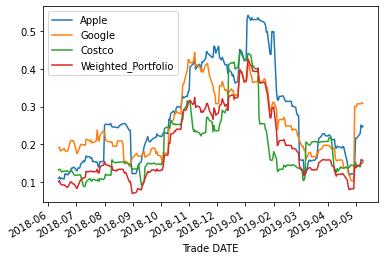

In [602]:
# Calculate rolling standard deviation

new_myportfolio_dataframe_rollingstd = (new_myportfolio_dataframe_dailyreturns.rolling(window=21).std() * np.sqrt(252))
new_myportfolio_dataframe_rollingstd

# Plot rolling standard deviation

(new_myportfolio_dataframe_dailyreturns.rolling(window=21).std() * np.sqrt(252)).plot()

### Calculate and plot the correlation

<AxesSubplot:>

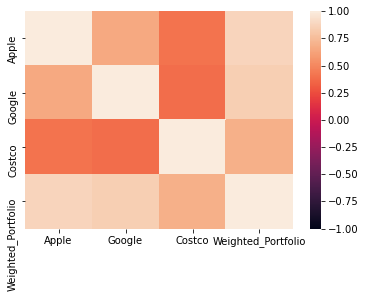

In [603]:
# Calculate and plot the correlation

new_myportfolio_correlation = new_myportfolio_dataframe_dailyreturns.corr().round(2)
sns.heatmap(new_myportfolio_correlation, vmin=-1, vmax=1)


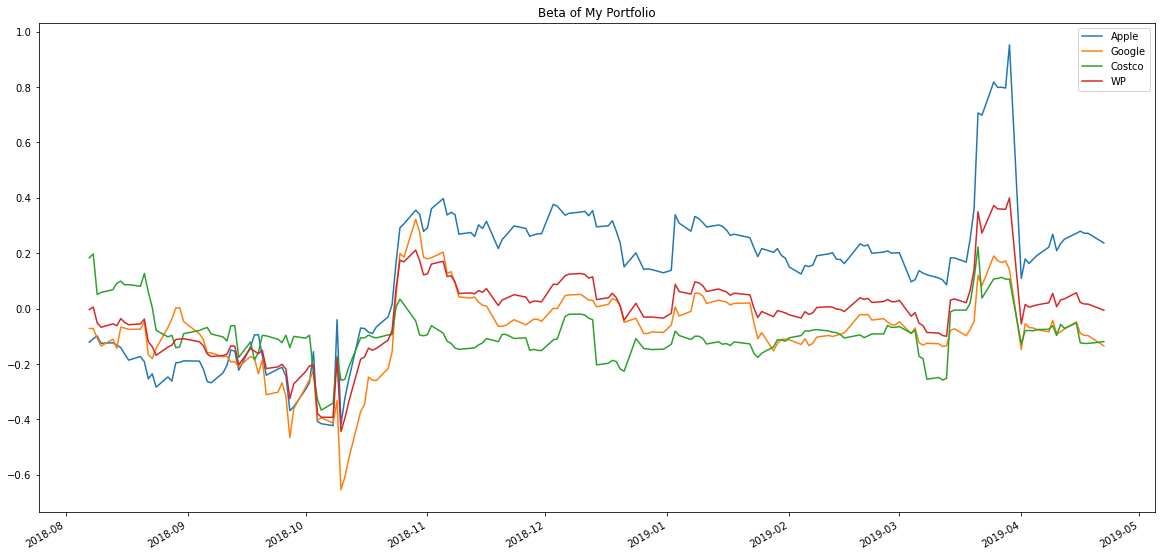

In [616]:
ax = Apple_beta.plot(figsize=(20, 10), title='Beta of My Portfolio')
Google_beta.plot(ax=ax)
Costco_beta.plot(ax=ax)
Weighted_Portfolio_beta.plot(ax=ax)
ax.legend(["Apple", "Google", "Costco", "WP"])

In [594]:
### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500


Apple_covariance_rolling = new_myportfolio_dataframe_dailyreturns['Apple'].rolling(window=60).cov(combined_dataframe['daily return500'])
Google_covariance_rolling = new_myportfolio_dataframe_dailyreturns['Google'].rolling(window=60).cov(combined_dataframe['daily return500'])
Costco_covariance_rolling = new_myportfolio_dataframe_dailyreturns['Costco'].rolling(window=60).cov(combined_dataframe['daily return500'])
Weighted_Portfolio_covariance_rolling = new_myportfolio_dataframe_dailyreturns['Weighted_Portfolio'].rolling(window=60).cov(combined_dataframe['daily return500'])



In [597]:
variance_rolling = combined_dataframe['daily return500'].rolling(window=60).var()
variance_rolling

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23         NaN
Name: daily return500, Length: 1043, dtype: float64

In [628]:
Rolling_Apple_beta = Apple_covariance_rolling / variance_rolling
Rolling_Google_beta = Google_covariance_rolling / variance_rolling
Rolling_Costco_beta = Costco_covariance_rolling / variance_rolling
Rolling_Weighted_Portfolio_beta = Weighted_Portfolio_covariance_rolling / variance_rolling


Apple: 2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
              ..
2019-05-03   NaN
2019-05-06   NaN
2019-05-07   NaN
2019-05-08   NaN
2019-05-09   NaN
Length: 1055, dtype: float64


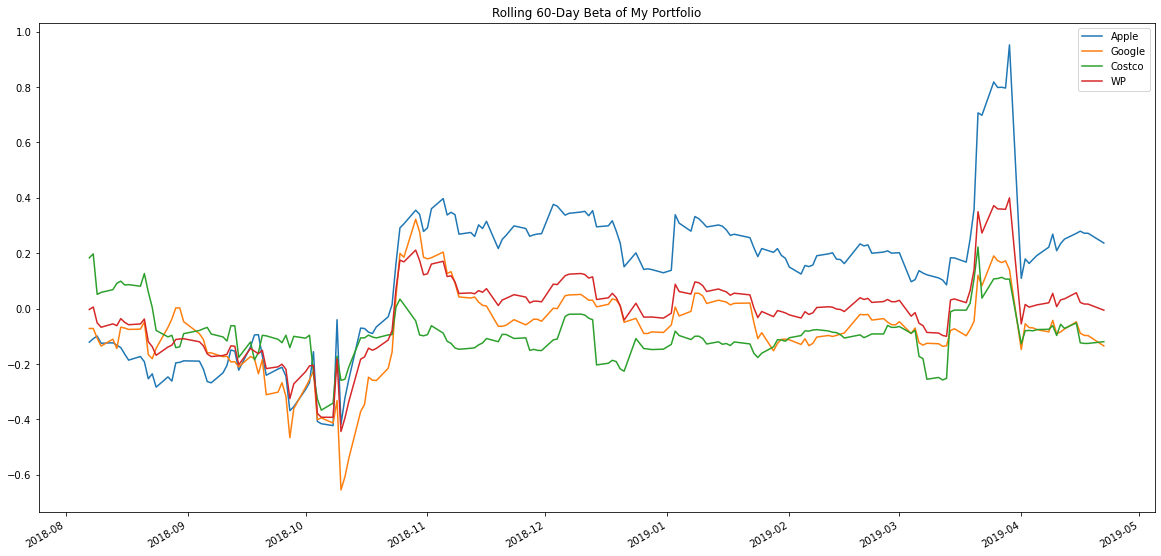

In [629]:
ax = Rolling_Apple_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')
Rolling_Google_beta.plot(ax=ax)
Rolling_Costco_beta.plot(ax=ax)
Rolling_Weighted_Portfolio_beta.plot(ax=ax)
ax.legend(["Apple", "Google", "Costco", "WP"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [591]:
# Calculate Annualzied Sharpe Ratios
rf_rate = 0
new_myportfolio_dataframe_dailyreturns.mean()

Apple                 0.000426
Google                0.000366
Costco                0.000964
Weighted_Portfolio    0.000585
dtype: float64

In [590]:
new_myportfolio_dataframe_std

Apple                 0.018706
Google                0.016602
Costco                0.013186
Weighted_Portfolio    0.013245
dtype: float64

In [592]:
new_daily_sharpe = ((new_myportfolio_dataframe_dailyreturns.mean()-rf_rate))/new_myportfolio_dataframe_std
new_daily_sharpe

new_sharpe_ratios = new_daily_sharpe * np.sqrt(252)
new_sharpe_ratios.sort_values(ascending=False)

Costco                1.160482
Weighted_Portfolio    0.701280
Apple                 0.361306
Google                0.349657
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

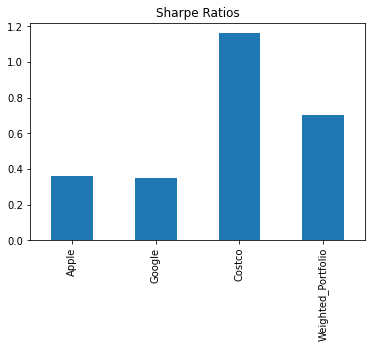

In [593]:
# Visualize the sharpe ratios as a bar plot

new_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [ ]:
#Looking at the Sharpe ratios, Weighted Portfolio provided excess returns compared to Apple and Google with the only exception being Costco which outperformed all.




